<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# Курсова робота із методів оптимізації на тему:
##**Метод найшвидшого спуску**
Виконала: студентка групи КМ-82, Бурлаченко Яна Борисівна

#####Керівник: доктор фізико-математичних наук Норкін Богдан Володимирович


Зміст


* Вступ
* Постановка задачі
* Матеріали та методи
* Розв'язання задачі
** Імпорт необхідних бібліотек
** Визначення функцій
** Обчислення
* Висновки
* Список використаних джерел

**Вступ**

Проблема багатовимірної оптимізації часто полягає в неможливості аналітичного відображення цільової функції. Для вирішення даної проблеми використовуються чисельні методи. В даній роботі буде описано та програмно реалізоване один з методів багатовимірної оптимізації 1-го порядку, а саме модифікований Партан метод найшвидшого спуску.

**Постановка задачі**

Дослідити збіжність методу найшвидшого спуску та партан-методу найшвидшого спуску при мінімізації степеневої функції  в залежності від:
* Величини кроку h при обчисленні похідних.
* Схеми обчислення похідних.
* Виду методу одновимірного пошуку (ДСК-Пауелла або Золотого перетину).
* Точності методу одновимірного пошуку.
* Значення параметру в алгоритмі Свена.
* Вигляду критерію закінчення. 
* Порівняти з методом найшвидшого спуску.

Використати метод штрафних функцій (метод внутрішньої точки) для умовної оптимізації при розташування локального мінімума поза випуклої допустимої області.


**Матеріали та методи**

“Партан” є скороченням від терміну
*parallel tangents* (паралельні дотичні).
Розглянемо загальний партан-алгоритм для
випадку квадратичної функції двох змінних.

 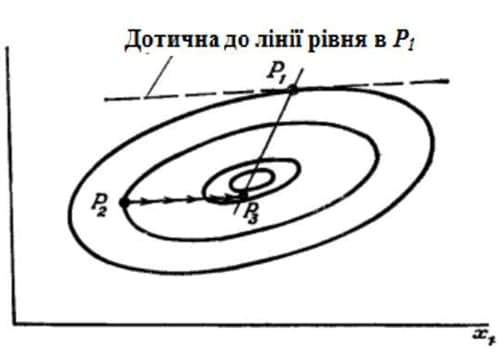

Р1 і Р2 – будь-які дві точки площини.
Спочатку рухаємося з Р2 паралельно
дотичній до лінії рівня в точці Р1 до тих пір,
поки не буде досягнуто мінімум функції f(х) у
деякій точці Р3. Дотичні в Р1 і Р3 паралельні, а мінімум f(х) знаходиться на
лінії, яка проходить через точки Р1 і Р3. Напрями, отримані за допомогою
загального партан – алгоритму, є спряженими. 
